In [1]:
# Set up imports and libraries
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.feature_extraction.text import  TfidfTransformer
from sklearn.pipeline import Pipeline
import seaborn as sns
import string
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
import nltk
#nltk.download('punkt')
#nltk.download('vader_lexicon')
#nltk.download('stopwords')

In [2]:
# import business dataset
import pandas as pd
yelp_busn = []
r_dtypes = {"stars": np.float16, 
            "latitude": np.int32, 
            "longitude": np.int32,
           }
with open("yelp_academic_dataset_business.json", "r", encoding='utf8') as f:
    reader = pd.read_json(f, orient="records", lines=True, 
                          dtype=r_dtypes, chunksize=1000)
        
    for chunk in reader:
        reduced_chunk = chunk.drop(columns=['is_open', 'longitude','latitude','hours'])\
                             .query("`state` == 'FL'")
        yelp_busn.append(reduced_chunk) #`state` == 'FL',
    
yelp_busn = pd.concat(yelp_busn, ignore_index=True) #set index?
#yelp_busn.describe

In [3]:
# limit review set to restaurants in FL for the time period
yelp_busn = yelp_busn[yelp_busn['categories'].str.contains('Restaurant')==True]
yelp_busn

,business_id,name,address,city,state,postal_code,stars,review_count,attributes,categories
2,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,,Tampa Bay,FL,33602,4.0,10,"{'Alcohol': ''none'', 'OutdoorSeating': 'None'...","Vietnamese, Food, Restaurants, Food Trucks"
4,0bPLkL0QhhPO5kt1_EXmNQ,Zio's Italian Market,2575 E Bay Dr,Largo,FL,33771,4.5,100,"{'OutdoorSeating': 'False', 'RestaurantsGoodFo...","Food, Delis, Italian, Bakeries, Restaurants"
7,uI9XODGY_2_ieTE6xJ0myw,Roman Forum,10440 N Dale Mabry Hwy,Tampa,FL,33618,4.0,23,"{'BusinessParking': '{'garage': False, 'street...","Restaurants, American (New), Italian"
8,JgpnXv_0XhV3SfbfB50nxw,Joe's Pizza,2038 N Dale Mabry Hwy,Tampa,FL,33607,4.0,35,"{'BusinessParking': '{'garage': False, 'street...","Restaurants, Pizza"
12,pJfh3Ct8iL58NZa8ta-a5w,Top Shelf Sports Lounge,3173 Cypress Ridge Blvd,Wesley Chapel,FL,33544,4.5,95,"{'BestNights': '{'monday': False, 'tuesday': F...","Burgers, Sports Bars, Bars, Lounges, Restauran..."
13,RK6-cJ9hj53RzOlCBmpT-g,Impasto,,Tampa,FL,33611,5.0,5,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Restaurants, Italian, Food Trucks, Food"
14,vje0KIiE7vtpx7JzmBx5LQ,The Pearl,163 107th Ave,Treasure Island,FL,33706,4.0,129,"{'WiFi': ''free'', 'NoiseLevel': 'u'average'',...","Restaurants, French, Moroccan, Seafood, Medite..."
21,aNtKyc2rr-uK5cqzY9TVQQ,Chipotle Mexican Grill,10160 Ulmerton Rd,Largo,FL,33771,3.0,19,"{'RestaurantsPriceRange2': '1', 'Caters': 'Tru...","Mexican, Fast Food, Restaurants"
25,P10BsKUeoeCeVoK4BS2u0w,Trust Me BBQ,8624 US Hwy 301 S,Riverview,FL,33569,4.0,29,"{'Ambience': '{'romantic': False, 'intimate': ...","Restaurants, Barbeque"
26,7Du9oW73YcYFmXdtU5aiSg,Kinjo's Japanese Restaurant,2875 Tyrone Blvd N,Saint Petersburg,FL,33710,3.5,17,"{'RestaurantsPriceRange2': '2', 'RestaurantsGo...","Japanese, Sushi Bars, Restaurants"


In [4]:
#import the review data set
yelp_reviews = []
r_dtypes = {"stars": np.float16, 
            "useful": np.int32, 
            "funny": np.int32,
            "cool": np.int32,
           }
with open("yelp_academic_dataset_review.json", "r", encoding='utf8') as f:
    reader = pd.read_json(f, orient="records", lines=True, 
                          dtype=r_dtypes, chunksize=1000)
        
    for chunk in reader:
        reduced_chunk = chunk.drop(columns=['review_id', 'user_id','useful','funny','cool'])\
                             .query('date >= "2022-01-01"')
        yelp_reviews.append(reduced_chunk)
        
yelp_reviews = pd.concat(yelp_reviews, ignore_index=True)
#yelp_reviews.describe #80k rows for 12/1/21; 31665  for 2022-01-01

In [5]:
yelp_reviews.describe()

,stars
count,31665.00000
mean,inf
std,1.62207
min,1.00000
25%,2.00000
50%,5.00000
75%,5.00000
max,5.00000


In [6]:
keys = list(yelp_busn['business_id'].values) #business filtered to FL and restaurant
keys
yelp_busn.set_index('business_id') #not a good idea, there are dupes
yelp_reviews.set_index('business_id')
i1 = yelp_reviews.index
i2 = yelp_busn.index
yelp_reviews_FL = yelp_reviews[i1.isin(i2)]
yelp_reviews_FL

,business_id,stars,text,date
2,Jo4ei-c-5H53IxZxAVf1jQ,5.0,Danielle did a great job! She listened and cu...,2022-01-03 03:17:03
4,9MHe5jAym2d8VhT_NbCRyw,2.0,We Ordered pork fried rice and beef chow mei ...,2022-01-06 03:59:21
7,6U0ZweWWWQUzea2rF4zKgQ,5.0,Food was good love the Cuban sandwiche \nThe p...,2022-01-10 19:54:45
8,yYpU8EWucx32OYIIHqP63A,1.0,Have called this location multiple times throu...,2022-01-11 21:07:05
12,LIoU5gBv75l1lMFaQ3wyfQ,5.0,"Excellent, stopped in for a late lunch and was...",2022-01-03 20:37:31
13,WusgaQ64KO8y2KAAHtTxWQ,5.0,Staff is friendly. The gyro I had was good! Si...,2022-01-17 19:06:04
14,K7rsFcHcO_LYrgWvTAik2w,5.0,Finally a classic NY deli that lives up to the...,2022-01-18 01:13:01
21,W8Z4rXYkmZlEVSaxIVjyvg,5.0,We liked it. My knuckle sandwich was perfect. ...,2022-01-06 00:17:22
25,kk_oEw1j3xQ-cJaAII8A0Q,1.0,The good news is that the pharmacy was open on...,2022-01-01 19:42:36
26,kJXpZfEneOByy7WoVZEW8w,5.0,Took a 2nd trip to Phidelity Records today... ...,2022-01-05 00:31:21


In [7]:
# append text length of review
yelp_reviews_FL.describe
yelp_reviews_FL['text length'] = yelp_reviews_FL['text'].apply(len)
yelp_reviews_FL.head()
yelp_reviews_FL

C:\Users\Caine\AppData\Local\Temp/ipykernel_12960/3368109950.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yelp_reviews_FL['text length'] = yelp_reviews_FL['text'].apply(len)


,business_id,stars,text,date,text length
2,Jo4ei-c-5H53IxZxAVf1jQ,5.0,Danielle did a great job! She listened and cu...,2022-01-03 03:17:03,278
4,9MHe5jAym2d8VhT_NbCRyw,2.0,We Ordered pork fried rice and beef chow mei ...,2022-01-06 03:59:21,148
7,6U0ZweWWWQUzea2rF4zKgQ,5.0,Food was good love the Cuban sandwiche \nThe p...,2022-01-10 19:54:45,116
8,yYpU8EWucx32OYIIHqP63A,1.0,Have called this location multiple times throu...,2022-01-11 21:07:05,874
12,LIoU5gBv75l1lMFaQ3wyfQ,5.0,"Excellent, stopped in for a late lunch and was...",2022-01-03 20:37:31,317
13,WusgaQ64KO8y2KAAHtTxWQ,5.0,Staff is friendly. The gyro I had was good! Si...,2022-01-17 19:06:04,105
14,K7rsFcHcO_LYrgWvTAik2w,5.0,Finally a classic NY deli that lives up to the...,2022-01-18 01:13:01,187
21,W8Z4rXYkmZlEVSaxIVjyvg,5.0,We liked it. My knuckle sandwich was perfect. ...,2022-01-06 00:17:22,95
25,kk_oEw1j3xQ-cJaAII8A0Q,1.0,The good news is that the pharmacy was open on...,2022-01-01 19:42:36,495
26,kJXpZfEneOByy7WoVZEW8w,5.0,Took a 2nd trip to Phidelity Records today... ...,2022-01-05 00:31:21,136


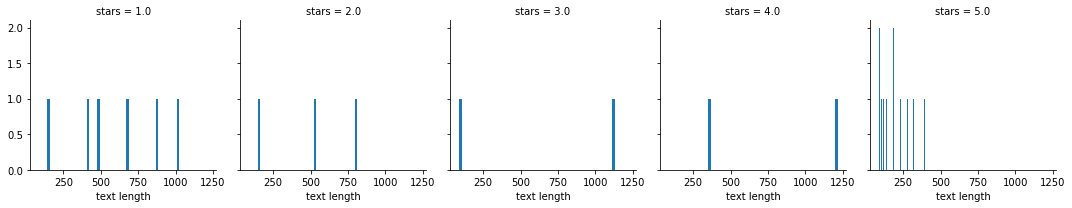

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
g = sns.FacetGrid(data=yelp_reviews_FL, col='stars')
g.map(plt.hist, 'text length', bins=50)

In [9]:
# Data Pre Processing
# 1. Remove Stop Words
# 2. Stem
# 3. Tokenize
# 4. Counts
# 5. Replace smileies

#does not filter to restaurants - need business dataset
#createa dataset without 3 stars since those are neutral
yelp_data = yelp_reviews_FL[(yelp_reviews_FL['stars'] > 3) | (yelp_reviews_FL['stars'] < 3)]
#yelp_reviews['label'] = 0

X = pd.DataFrame(yelp_data['text'])
y = pd.DataFrame(yelp_data['stars'])

In [10]:
#1 Remove stop words - Done
def process_text(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

X['text'] = X['text'].apply(process_text)
X

,text
2,"[Danielle, great, job, listened, cut, hair, wa..."
4,"[Ordered, pork, fried, rice, beef, chow, mei, ..."
7,"[Food, good, love, Cuban, sandwiche, place, cl..."
8,"[called, location, multiple, times, throughout..."
12,"[Excellent, stopped, late, lunch, happy, food,..."
13,"[Staff, friendly, gyro, good, Simple, flavorfu..."
14,"[Finally, classic, NY, deli, lives, hype, Food..."
21,"[liked, knuckle, sandwich, perfect, Friendly, ..."
25,"[good, news, pharmacy, open, New, Years, Day, ..."
26,"[Took, 2nd, trip, Phidelity, Records, today, l..."


In [11]:
# 2 Stem - Done
from nltk.stem.snowball import SnowballStemmer
snowBallStemmer = SnowballStemmer("english")
X['stemmed'] = X['text'].apply(lambda x: [snowBallStemmer.stem(y) for y in x]) # Stem every word.
X = X.drop(columns=['text']) # Get rid of the unstemmed column.
X # Print dataframe.

,stemmed
2,"[daniell, great, job, listen, cut, hair, way, ..."
4,"[order, pork, fri, rice, beef, chow, mei, fun,..."
7,"[food, good, love, cuban, sandwich, place, cle..."
8,"[call, locat, multipl, time, throughout, day, ..."
12,"[excel, stop, late, lunch, happi, food, servic..."
13,"[staff, friend, gyro, good, simpl, flavor, eve..."
14,"[final, classic, ny, deli, live, hype, food, i..."
21,"[like, knuckl, sandwich, perfect, friend, prof..."
25,"[good, news, pharmaci, open, new, year, day, w..."
26,"[took, 2nd, trip, phidel, record, today, love,..."


In [12]:
Xhead = X.head
Xhead

<bound method NDFrame.head of                                               stemmed
2   [daniell, great, job, listen, cut, hair, way, ...
4   [order, pork, fri, rice, beef, chow, mei, fun,...
7   [food, good, love, cuban, sandwich, place, cle...
8   [call, locat, multipl, time, throughout, day, ...
12  [excel, stop, late, lunch, happi, food, servic...
13  [staff, friend, gyro, good, simpl, flavor, eve...
14  [final, classic, ny, deli, live, hype, food, i...
21  [like, knuckl, sandwich, perfect, friend, prof...
25  [good, news, pharmaci, open, new, year, day, w...
26  [took, 2nd, trip, phidel, record, today, love,...
27  [despit, receiv, email, say, would, contact, c...
29  [nice, locat, indooroutdoor, seat, friend, sta...
32  [best, ever, spent, dr, olsen, perfect, job, r...
33  [first, alway, send, sale, person, good, news,...
35  [food, servic, top, tier, dont, rememb, server...
38  [one, happi, place, friend, staff, delici, bow...
39  [excit, take, trip, chicken, salti, almost, in..

In [13]:
# 3. Tokenize data to turn words into integers for modeling
cv = CountVectorizer() #stop_words=my_stop_words, ngram_range=(2,2
X['stemmed']=[" ".join(review) for review in X['stemmed'].values] #convert from list to text
X_cv = cv.fit_transform(X['stemmed'])
X_cv

<22x500 sparse matrix of type '<class 'numpy.int64'>'
	with 716 stored elements in Compressed Sparse Row format>

<BarContainer object of 10 artists>

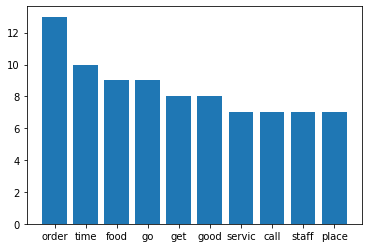

In [14]:
#SAMPLE
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
bigram_df = pd.DataFrame(X_cv.toarray(), columns=cv.get_feature_names()) ## Could not get this to work!!!
bigram_frequency = pd.DataFrame(bigram_df.sum(axis=0)).reset_index()
bigram_frequency.columns = ['bigram', 'frequency']
bigram_frequency = bigram_frequency.sort_values(by='frequency', ascending=False).head(10)
plt.bar(bigram_frequency['bigram'],bigram_frequency['frequency'])

<AxesSubplot:ylabel='stars'>

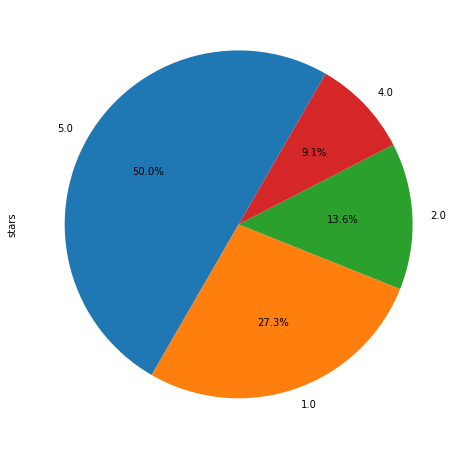

In [15]:
# pie chart of stars for FL restaurants
plt.figure(figsize=(8,8))
y['stars'].value_counts().plot.pie(autopct='%1.1f%%', startangle=60)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


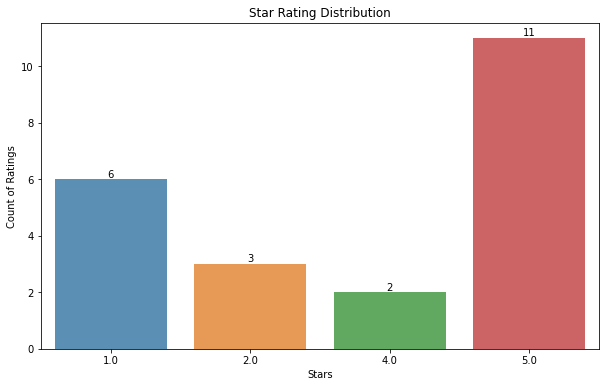

In [16]:
#frequency of star ratings
x=y['stars'].value_counts()
x=x.sort_index()
plt.figure(figsize=(10,6))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Star Rating Distribution")
plt.ylabel('Count of Ratings')
plt.xlabel('Stars')
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height+0.01, label,
            ha='center', va='bottom')
plt.show();

In [17]:
X_cv
print('Shape of Sparse Matrix: ', X_cv.shape)
print('Amount of Non-Zero occurrences: ', X_cv.nnz)
# Percentage of non-zero values
density = (100.0 * X_cv.nnz / (X_cv.shape[0] * X_cv.shape[1]))
print("Density: {}".format((density)))

#graphics
#wordcloud failed
#reviews over time
#dist of star ratings
#length fo text for ratings
#avg monthly rtating

Shape of Sparse Matrix:  (22, 500)
Amount of Non-Zero occurrences:  716
Density: 6.509090909090909


In [18]:
# set up nb model and run predictions
X_train, X_test, y_train, y_test = train_test_split(X_cv, y,test_size=0.3,random_state=101)
nb = MultinomialNB()
nb.fit(X_train,y_train)

predictions = nb.predict(X_test)
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[0 2 1 0]
 [0 0 1 0]
 [0 0 0 0]
 [0 1 0 2]]


              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         3
         2.0       0.00      0.00      0.00         1
         4.0       0.00      0.00      0.00         0
         5.0       1.00      0.67      0.80         3

    accuracy                           0.29         7
   macro avg       0.25      0.17      0.20         7
weighted avg       0.43      0.29      0.34         7



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision a

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


Populating the interactive namespace from numpy and matplotlib


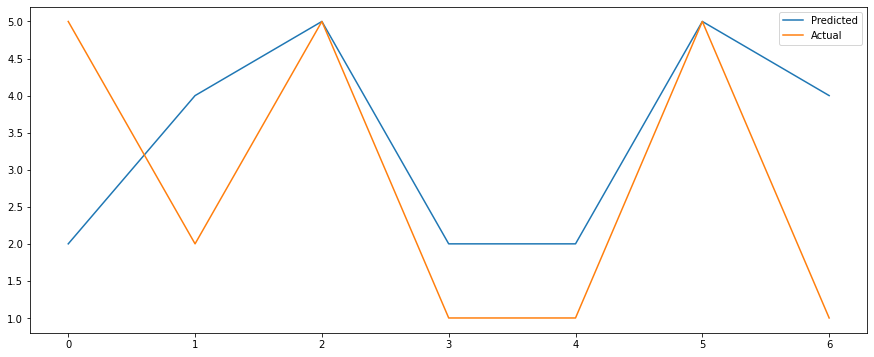

In [19]:
#nb performance
%pylab inline 
pylab.rcParams['figure.figsize'] = (15,6)
plt.plot(predictions[:20],label = 'Predicted')
plt.plot(y_test.values[:20], label = 'Actual')

plt.legend()
plt.show()

In [20]:
#lienar regression model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
predictions = lr.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report
new = np.asarray(y_test)
confusion_matrix(predictions,y_test)
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

         1.0       0.33      1.00      0.50         1
         2.0       0.00      0.00      0.00         0
         4.0       0.00      0.00      0.00         1
         5.0       1.00      0.60      0.75         5

    accuracy                           0.57         7
   macro avg       0.33      0.40      0.31         7
weighted avg       0.76      0.57      0.61         7



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision a

Populating the interactive namespace from numpy and matplotlib


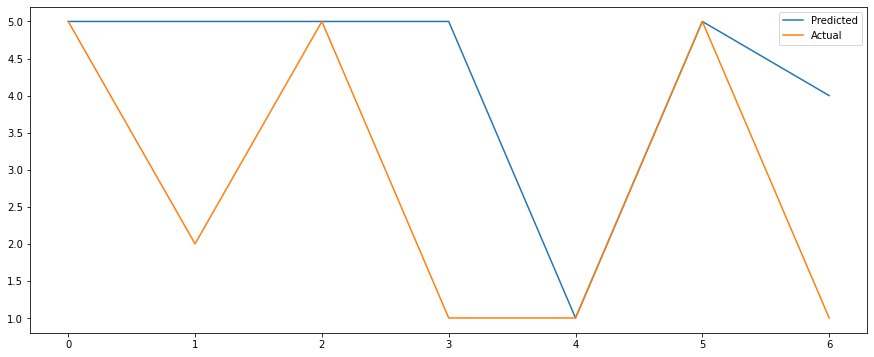

In [21]:
#linear regression performance
%pylab inline 
pylab.rcParams['figure.figsize'] = (15,6)
plt.plot(predictions[:20],label = 'Predicted')
plt.plot(y_test.values[:20], label = 'Actual')

plt.legend()
plt.show()
#shows one horz orange line when sample size is small due to accuracy

In [22]:
#could run vader before preprocessing to compare performance
#lexicon method
# Load SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# Instantiate new SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
# Generate sentiment scores
sentiment_scores = Xhead['stemmed'].apply(sid.polarity_scores)
sentiment = sentiment_scores.apply(lambda x: x['compound']) #get compound score
sentiment_scores
#could graph over time
monthly_sentiment = sentiment.resample('M').mean()
#is compound close to star rating?
#

TypeError: 'method' object is not subscriptable

In [24]:
### CAINE'S LAST MINUTE LAME svm EFFORTS ###
### ==================================== ###
# Code from here to the end is taken from the website noted below.
# https://medium.com/@vasista/sentiment-analysis-using-svm-338d418e3ff1#:~:text=Sentiment%20Analysis%20is%20the%20NLP%20technique%20that%20performs%20on%20the,positive%2C%20negative%2C%20or%20neutral.
# The work below models a sample dataset for movie reviews with the Support Vector Machine (SVM) model.
# 

<15x500 sparse matrix of type '<class 'numpy.int64'>'
	with 429 stored elements in Compressed Sparse Row format>

In [26]:
# train Data
trainData = pd.read_csv("https://raw.githubusercontent.com/Vasistareddy/sentiment_analysis/master/data/train.csv")
# test Data
testData = pd.read_csv("https://raw.githubusercontent.com/Vasistareddy/sentiment_analysis/master/data/test.csv")
trainData.sample(frac=1).head(5) # shuffle the df and pick first 5

,Content,Label
403,so here is the second of 1999's remakes of cla...,pos
1513,""" flubber "" is the second best example of how...",neg
636,50's `aliens vs . \nearth' idea revamped ! \ni...,pos
1451,some talented actresses are blessed with a dem...,neg
359,i saw simon birch in a basically sold out thea...,pos


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Create feature vectors
vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)
train_vectors = vectorizer.fit_transform(trainData['Content'])
test_vectors = vectorizer.transform(testData['Content'])

import time
from sklearn import svm
from sklearn.metrics import classification_report
# Perform classification with SVM, kernel=linear
classifier_linear = svm.SVC(kernel='linear')
t0 = time.time()
classifier_linear.fit(train_vectors, trainData['Label'])
t1 = time.time()
prediction_linear = classifier_linear.predict(test_vectors)
t2 = time.time()
time_linear_train = t1-t0
time_linear_predict = t2-t1
# results
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
report = classification_report(testData['Label'], prediction_linear, output_dict=True)
print('positive: ', report['pos'])
print('negative: ', report['neg'])

Training time: 5.872278s; Prediction time: 0.599021s
positive:  {'precision': 0.9191919191919192, 'recall': 0.91, 'f1-score': 0.9145728643216081, 'support': 100}
negative:  {'precision': 0.9108910891089109, 'recall': 0.92, 'f1-score': 0.9154228855721394, 'support': 100}
